# 1.3.1 : Chargement et Exploration des Données

In [1]:
# Import du jeu de données
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
class_names = [
    "Avion",
    "Automobile",
    "Oiseau",
    "Chat",
    "Cerf",
    "Chien",
    "Grenouille",
    "Cheval",
    "Bateau",
    "Camion"
]

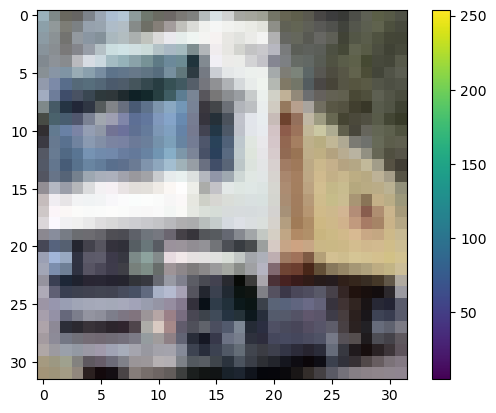

In [2]:
# Affichage d'une image
import matplotlib.pyplot as plt

plt.imshow(train_images[1])
plt.colorbar()
plt.show()

# 1.3.2 : Prétraitement des Données

In [3]:
# Normalisation des données
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Affichage des données avant encodage
train_labels.shape

(50000, 1)

In [5]:
train_labels[0]

array([6], dtype=uint8)

In [6]:
# Encodage des labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [7]:
# Affichage des données après encodage
train_labels.shape

(50000, 10)

In [8]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# 1.3.3 : Construction de l'Architecture CNN

In [9]:
# Création du modele

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 32,
        kernel_size = (3, 3),
        input_shape = (32, 32, 3) # Hauteur, Largeur, Nombre de canaux de couleurs (RGB => 3)
    ),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(
        filters = 64,
        kernel_size = (3, 3),
        input_shape = (15, 15, 32) # Hauteur et Largeur <= (Entrée - Kernel + 1) / Pool Size = (32 - 3 + 1) / 2 | Canaux <= Filtres (Premier Conv2D)
    ),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(
        filters = 64,
        kernel_size = (3, 3),
        input_shape = (6, 6, 64) # Hauteur et Largeur <= (Entrée - Kernel + 1) / Pool Size = (15 - 3 + 1) / 2 | Canaux <= Filtres (Deuxieme Conv2D)
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.summary()

/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# 1.3.4 : Callbacks, Compilation et Entraînement

In [10]:
# Définition des Callbacks

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2)
model_chechkpoint_callback = tf.keras.callbacks.ModelCheckpoint(monitor = "val_loss", filepath = "./model.keras", save_best_only = True)

In [11]:
# Compilation du modele

model.compile(
    optimizer = tf.keras.optimizers.Adam(), # A l'air d'être le meilleur en moyenne (D'après l'étape 4 du TP précédent, je mets la capture des scores moyens par optimizer dans le document)
    loss = tf.keras.losses.CategoricalCrossentropy(), # Pour coller avec le format "one-hot"
    metrics = ['accuracy']
)

In [12]:
# Entrainement du modele

history = model.fit(
    train_images,
    train_labels,
    epochs = 10, # Comme pour l'optimizer, sans être le meilleur, ça a l'air d'être le plus intéressant tout en étant suffisamment rapide
    validation_split = 0.1,
    callbacks = [early_stopping_callback, model_chechkpoint_callback]
)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4125 - loss: 1.6472 - val_accuracy: 0.5484 - val_loss: 1.2854
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5691 - loss: 1.2366 - val_accuracy: 0.6014 - val_loss: 1.1657
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6110 - loss: 1.1265 - val_accuracy: 0.6240 - val_loss: 1.1104
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6318 - loss: 1.0670 - val_accuracy: 0.6168 - val_loss: 1.1100
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6547 - loss: 1.0063 - val_accuracy: 0.6182 - val_loss: 1.1286
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6619 - loss: 0.9798 - val_accuracy: 0.6254 - val_loss: 1.0974
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6789 - loss: 0.9391 - val_accuracy: 0.6244 - val_loss: 1.1119
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6850 - loss: 0

# 1.3.5 : Évaluation et Analyse

In [13]:
# Evaluation de la performance

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy:\t{test_acc:.4f}")
print(f"Test loss:\t{test_loss:.4f}")

Test accuracy:	0.6288
Test loss:	1.1193


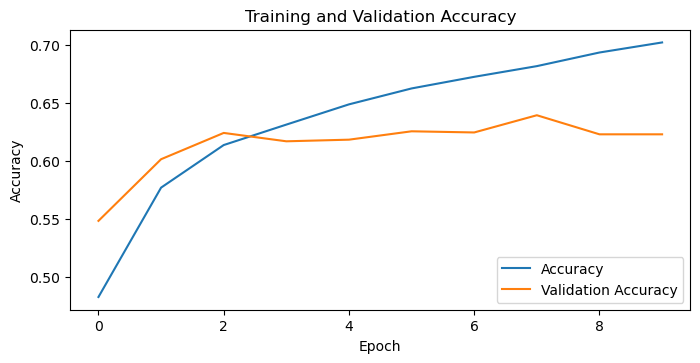

In [14]:
# Affichage du graph Accuracy

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label = "Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Training and Validation Accuracy")

plt.show()

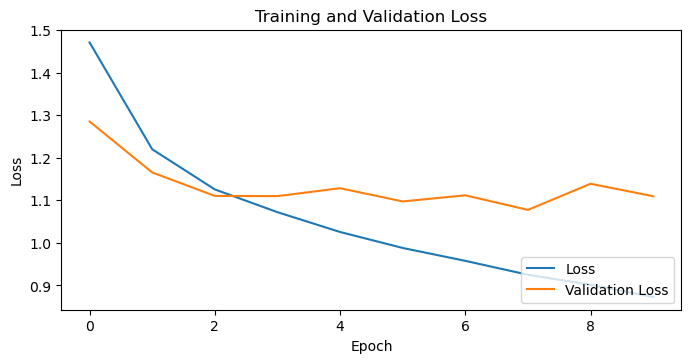

In [15]:
# Affichage du graph Loss

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.legend(loc = "lower right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training and Validation Loss")

plt.show()

# 1.3.6 Matrice de confusion

In [16]:
# Matrice de confusion

import numpy as np

test_labels_propa = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_propa, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
# Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix

matrice = confusion_matrix(
    np.argmax(test_labels, axis=1),
    test_labels_pred
)

matrice

array([[798,  50,  32,  23,   8,  10,   4,   6,  26,  43],
       [ 49, 819,   8,   6,   2,   5,   4,   7,  10,  90],
       [128,  17, 472,  76,  80,  96,  54,  49,  14,  14],
       [ 53,  37,  79, 500,  55, 156,  50,  35,  15,  20],
       [ 64,  15,  85,  80, 511,  46,  77, 107,   8,   7],
       [ 29,  15,  75, 191,  42, 560,  21,  51,   3,  13],
       [ 20,  23,  44, 120,  38,  35, 685,   9,  17,   9],
       [ 34,  11,  66,  34,  49,  84,   8, 693,   5,  16],
       [233,  97,  15,   8,   2,   8,   5,  11, 565,  56],
       [ 62, 152,  14,  18,   4,  10,   2,  20,  33, 685]])

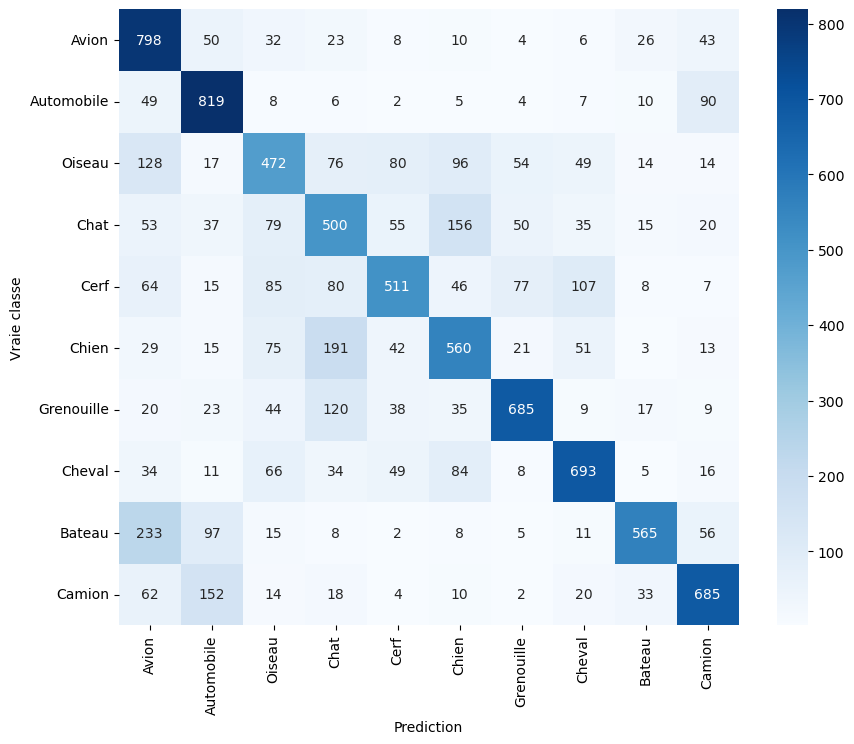

In [18]:
# Affichage avec Seaborn (Plus lisible de mon point de vue)
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    matrice,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.ylabel('Vraie classe')
plt.xlabel('Prediction')
plt.show()

# 1.3.7 Ouverture : Apprentissage par Transfert (Transfer Learning)

In [19]:
# Suppression du modele precedent pour liberer de la mémoire

import gc

del model
tf.keras.backend.clear_session()
gc.collect()

0

In [20]:
# Chargement du modele de base

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(96, 96, 3), # Minimum accepté par MobileNetV2
    include_top=False
)
base_model

<Functional name=mobilenetv2_1.00_96, built=True>

In [21]:
# Gel des poids

base_model.trainable = False
base_model

<Functional name=mobilenetv2_1.00_96, built=True>

In [22]:
# Ajout des couches

model = tf.keras.Sequential([
    tf.keras.layers.Resizing(96, 96), # Pour redimensionner les images depuis 32 x 32 vers 96 x 96 (Minimum accepte par MobileNetV2)
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(10, activation='softmax')
])
model

<Sequential name=sequential, built=False>

In [23]:
# Compilation du modele

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)
model

<Sequential name=sequential, built=False>

# 1.3.8 Tensorboard

In [24]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [25]:
# Entrainement du modele
model_chechkpoint_callback = tf.keras.callbacks.ModelCheckpoint(monitor = "val_loss", filepath = "./model_mobilenetv2.keras", save_best_only = True)

history = model.fit(
    train_images,
    train_labels,
    epochs = 10, # Comme pour l'optimizer, sans être le meilleur, ça a l'air d'être le plus intéressant tout en étant suffisamment rapide
    validation_split = 0.1,
    callbacks = [early_stopping_callback, model_chechkpoint_callback, tensorboard_callback]
)
history

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 63ms/step - accuracy: 0.6845 - loss: 2.2759 - val_accuracy: 0.8084 - val_loss: 0.5858
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 90s 64ms/step - accuracy: 0.8414 - loss: 0.4555 - val_accuracy: 0.7946 - val_loss: 0.6004
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 90s 64ms/step - accuracy: 0.8544 - loss: 0.4143 - val_accuracy: 0.7894 - val_loss: 0.6299


In [26]:
# Evaluation de la performance

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy:\t{test_acc:.4f}")
print(f"Test loss:\t{test_loss:.4f}")

Test accuracy:	0.7858
Test loss:	0.6548


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step


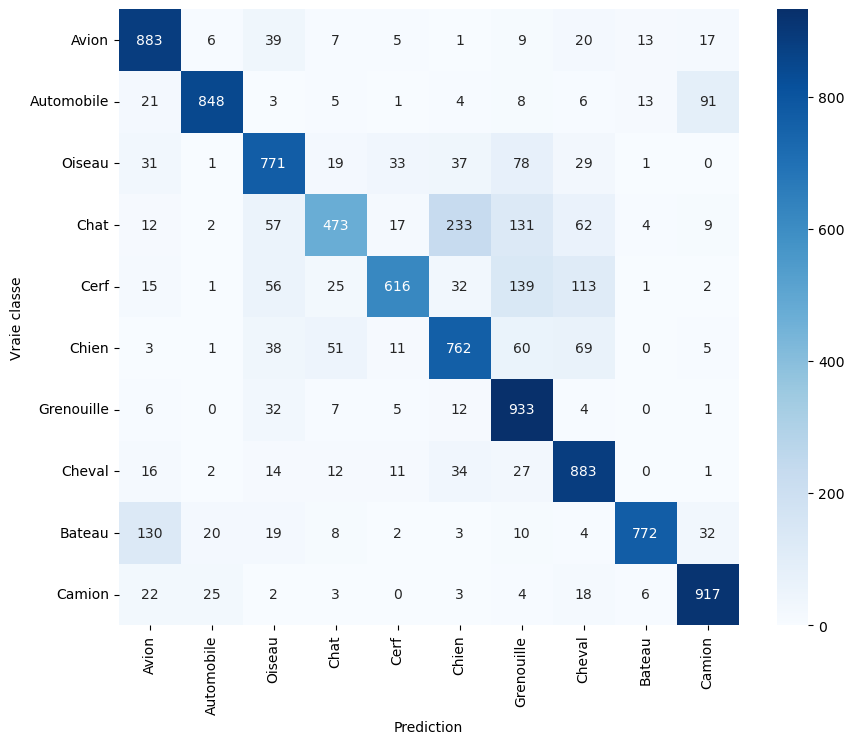

In [27]:
# Matrice de confusion

test_labels_propa = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_propa, axis=1)

matrice = confusion_matrix(
    np.argmax(test_labels, axis=1),
    test_labels_pred
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    matrice,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.ylabel('Vraie classe')
plt.xlabel('Prediction')
plt.show()

In [28]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

# 1.3.9 Tests des combinaisons possibles d’hyper-paramètres

In [29]:
# Definitionn des parametres

import numpy as np

optimizer_name_list = [
    "adam",
    "sgd",
    "adamax"
]

epochs_list = np.arange(20, 61, 10)

In [30]:
def creation_optimizer(nom):
    if nom == "adam":
        return tf.keras.optimizers.Adam()
    if nom == "sgd":
        return tf.keras.optimizers.SGD(momentum = 0.99)
    if nom == "adamax":
        return tf.keras.optimizers.Adamax()
    raise ValueError("Mauvais nom d'optimizer")

In [31]:
# Creation du LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * ops.exp(-0.1)

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [32]:
def entrainement(optimizer_name, epoch):
    model = tf.keras.Sequential([
        tf.keras.layers.Resizing(96, 96),
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    optimizer = creation_optimizer(optimizer_name)

    model.compile(
        optimizer = optimizer,
        loss = tf.keras.losses.CategoricalCrossentropy(),
        metrics = ['accuracy', tf.keras.metrics.Precision(class_id=1)] # Ajout de la metric Precision sur la classe 1
    )

    history = model.fit(
        train_images,
        train_labels,
        epochs = epoch,
        validation_split = 0.1,
        callbacks = [early_stopping_callback, model_chechkpoint_callback, tensorboard_callback],
        verbose = 0
    )

    test_loss, test_acc, test_precision = model.evaluate(test_images, test_labels, verbose = 0)

    del model
    tf.keras.backend.clear_session()

    return test_loss, test_acc, test_precision

In [33]:
# Boucle

i = 1
results = []

for optimizer_name in optimizer_name_list:
    for epochs in epochs_list:
        print(f"{i} / {3 * 5} - Optimizer: {optimizer_name} - Epoch: {epochs}")
        i += 1
        score = entrainement(optimizer_name, epochs)
        results.append({
            "optimizer": optimizer_name,
            "epoch": epochs,
            "test_loss": score[0],
            "test_acc": score[1],
            "test_precision": score[2]
        })

1 / 15 - Optimizer: adam - Epoch: 20
2 / 15 - Optimizer: adam - Epoch: 30
3 / 15 - Optimizer: adam - Epoch: 40
4 / 15 - Optimizer: adam - Epoch: 50
5 / 15 - Optimizer: adam - Epoch: 60
6 / 15 - Optimizer: sgd - Epoch: 20
7 / 15 - Optimizer: sgd - Epoch: 30
8 / 15 - Optimizer: sgd - Epoch: 40
9 / 15 - Optimizer: sgd - Epoch: 50
10 / 15 - Optimizer: sgd - Epoch: 60
11 / 15 - Optimizer: adamax - Epoch: 20
12 / 15 - Optimizer: adamax - Epoch: 30
13 / 15 - Optimizer: adamax - Epoch: 40
14 / 15 - Optimizer: adamax - Epoch: 50
15 / 15 - Optimizer: adamax - Epoch: 60


In [36]:
# Affichage du top 10

import pandas as pd

df = pd.DataFrame(results)
df.sort_values(by='test_loss', ascending=True).head(10)

,optimizer,epoch,test_loss,test_acc,test_precision
4,adam,60,0.656345,0.7876,0.975818
2,adam,40,0.667386,0.7873,0.963975
0,adam,20,0.674330,0.7935,0.867537
1,adam,30,0.675353,0.7888,0.867606
3,adam,50,0.727104,0.7779,0.889990
14,adamax,60,0.730959,0.8101,0.926195
13,adamax,50,0.736254,0.7991,0.887695
11,adamax,30,0.754488,0.7917,0.930407
10,adamax,20,0.783237,0.8105,0.930233
12,adamax,40,0.820037,0.7945,0.917695


In [35]:
# Creation du CSV

df.to_csv("data.csv")